In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
from pandas_datareader.data import DataReader

In [5]:
from datetime import datetime

In [6]:
from __future__ import division

In [7]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [8]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [9]:
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)
    


In [10]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-10,195.369995,191.619995,191.809998,192.580002,26220900.0,190.308762
2019-06-11,196.000000,193.600006,194.860001,194.809998,26932900.0,192.512451
2019-06-12,195.970001,193.389999,193.949997,194.190002,18221800.0,191.899780
2019-06-13,196.789993,193.600006,194.699997,194.149994,21674600.0,191.860229
2019-06-14,193.589996,190.300003,191.550003,192.740005,18761500.0,190.466873


In [11]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,260.571739,254.748064,257.247154,257.948023,3.349242e+07,256.550664
std,43.466691,42.291844,42.658357,43.184036,1.719635e+07,43.689275
min,193.589996,190.300003,191.550003,192.580002,1.136200e+07,190.308762
25%,218.029999,211.710007,214.839996,214.169998,2.184720e+07,212.448273
50%,263.109985,256.850006,258.690002,261.739990,2.825340e+07,260.415344
75%,300.579987,289.230011,295.059998,293.799988,3.813280e+07,293.006836
max,345.609985,332.010010,332.140015,343.989990,1.067212e+08,343.989990


In [12]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-06-10 to 2020-06-09
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


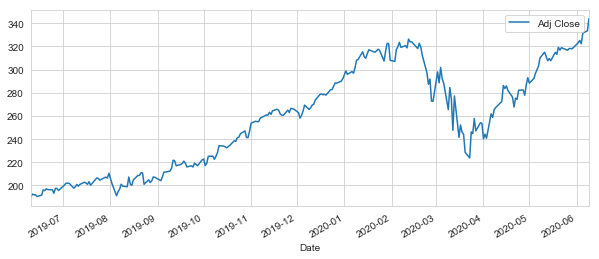

In [13]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

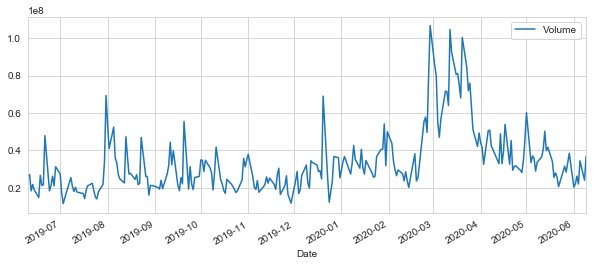

In [14]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [15]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = pd.Series(AAPL['Adj Close']).rolling(window=ma).mean()

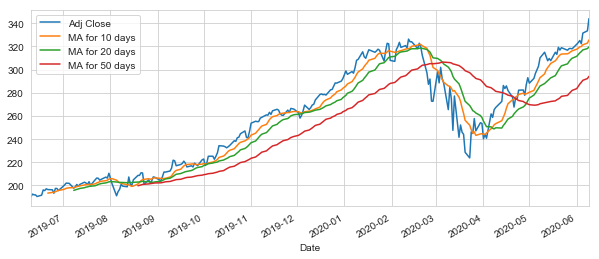

In [16]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4)) 

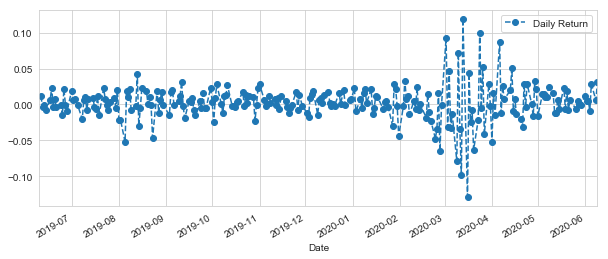

In [17]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

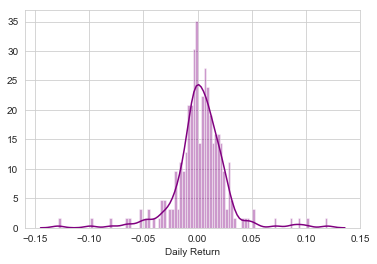

In [18]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color = 'purple')

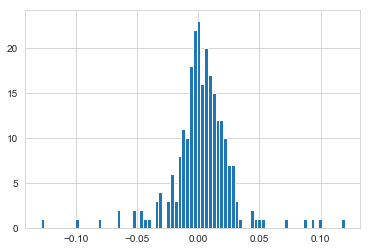

In [19]:
AAPL['Daily Return'].hist(bins=80)

In [20]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [21]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-06-10,190.308762,1860.630005,1080.380005,130.988159
2019-06-11,192.512451,1863.699951,1078.719971,130.494232
2019-06-12,191.899780,1855.319946,1077.030029,129.891647
2019-06-13,191.860229,1870.300049,1088.770020,130.711548
2019-06-14,190.466873,1869.670044,1085.349976,130.839981


In [22]:
tech_rets = closing_df.pct_change()

In [23]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-06-10,NaN,NaN,NaN,NaN
2019-06-11,0.011580,0.001650,-0.001537,-0.003771
2019-06-12,-0.003183,-0.004496,-0.001567,-0.004618
2019-06-13,-0.000206,0.008074,0.010900,0.006312
2019-06-14,-0.007262,-0.000337,-0.003141,0.000983


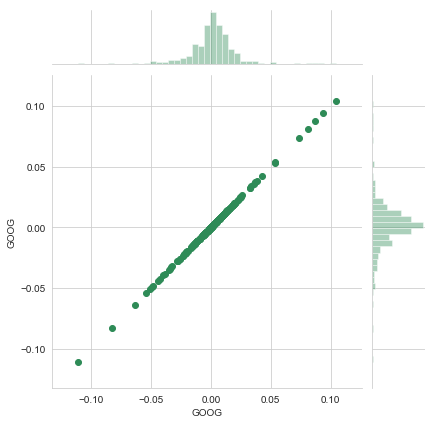

In [24]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

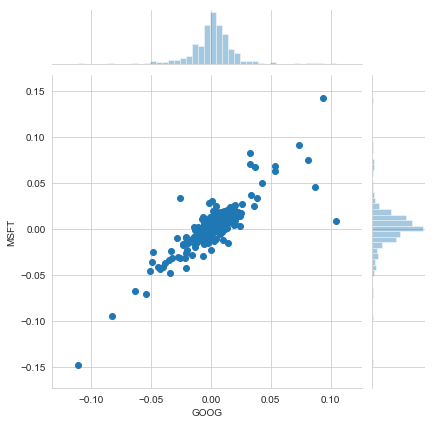

In [25]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

In [26]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-06-10,NaN,NaN,NaN,NaN
2019-06-11,0.011580,0.001650,-0.001537,-0.003771
2019-06-12,-0.003183,-0.004496,-0.001567,-0.004618
2019-06-13,-0.000206,0.008074,0.010900,0.006312
2019-06-14,-0.007262,-0.000337,-0.003141,0.000983


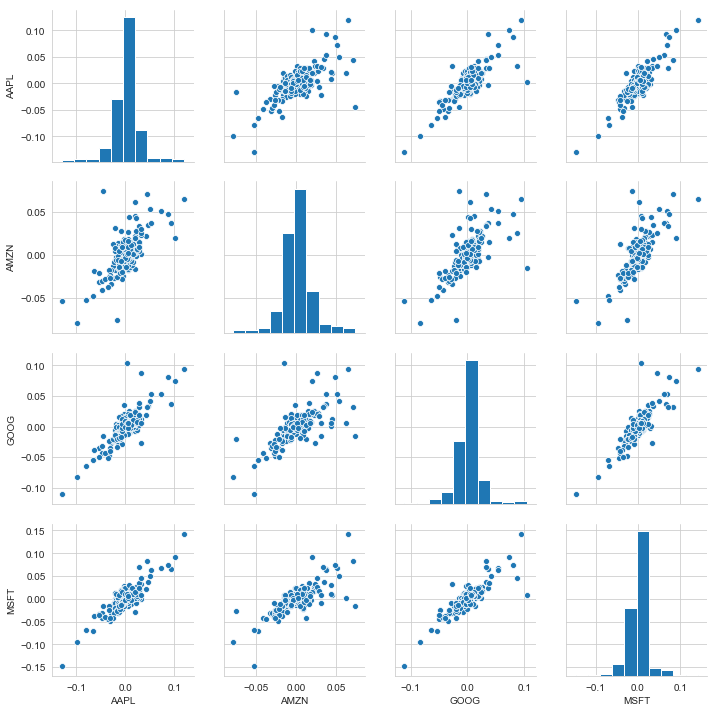

In [27]:
sns.pairplot(tech_rets.dropna())

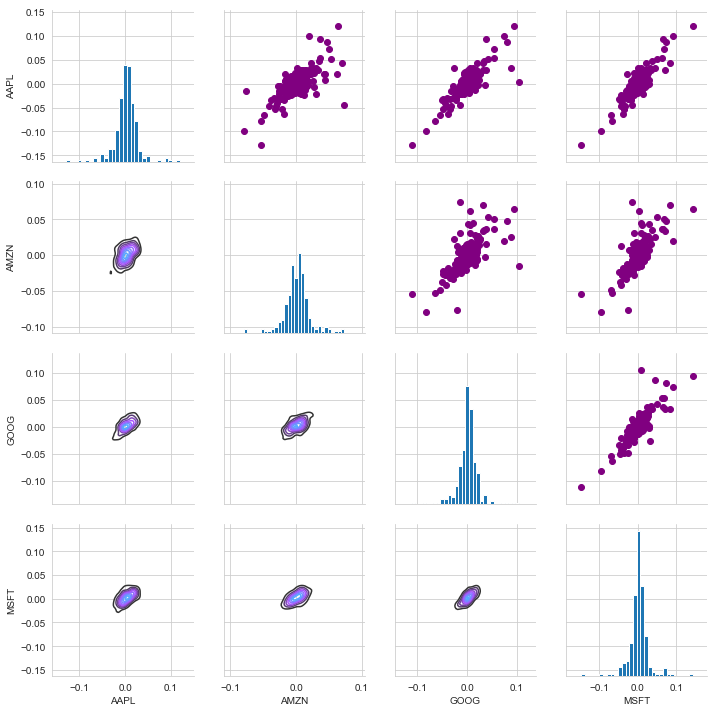

In [28]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

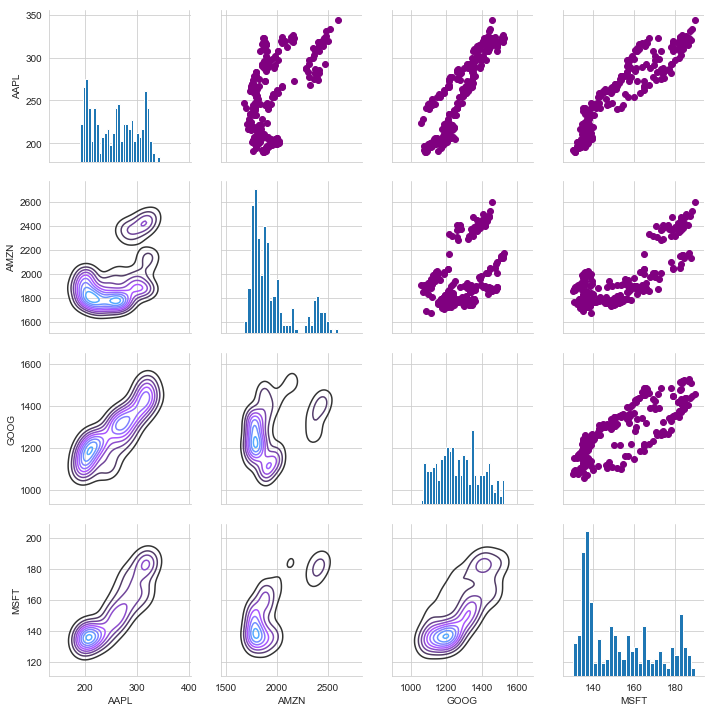

In [30]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

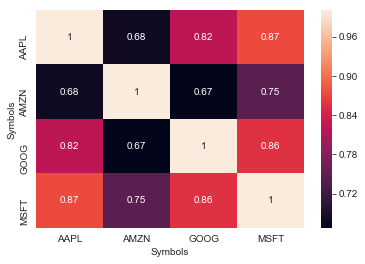

In [37]:
sns.heatmap(tech_rets.corr().dropna(),annot=True)

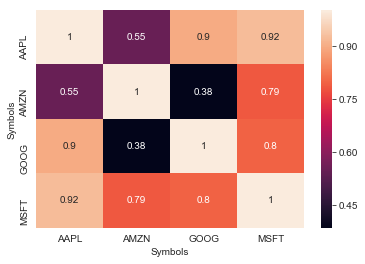

In [39]:
sns.heatmap(closing_df.corr().dropna(),annot=True)

In [40]:
rets = tech_rets.dropna()

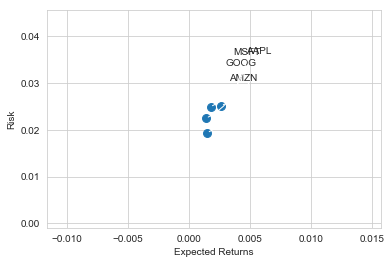

In [41]:
area = np.pi*20
plt.scatter(rets.mean(),rets.std(),s = area)

plt.xlabel('Expected Returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

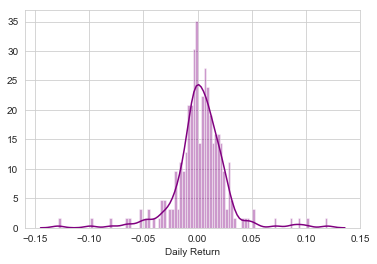

In [42]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [43]:
rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-06-11,0.011580,0.001650,-0.001537,-0.003771
2019-06-12,-0.003183,-0.004496,-0.001567,-0.004618
2019-06-13,-0.000206,0.008074,0.010900,0.006312
2019-06-14,-0.007262,-0.000337,-0.003141,0.000983
2019-06-17,0.005967,0.008750,0.006588,0.003020


In [45]:
rets['AAPL'].quantile(0.05)

-0.03308284476401163

In [46]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [54]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale = sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price
        

In [55]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-10,1092.660034,1072.322021,1072.979980,1080.380005,1464200,1080.380005
2019-06-11,1101.989990,1077.603027,1093.979980,1078.719971,1436700,1078.719971
2019-06-12,1080.930054,1067.540039,1078.000000,1077.030029,1061000,1077.030029
2019-06-13,1094.170044,1080.150024,1083.640015,1088.770020,1057700,1088.770020
2019-06-14,1092.689941,1080.171997,1086.420044,1085.349976,1111500,1085.349976


Text(0.5,1,'Monte carlo Analysis for Google')

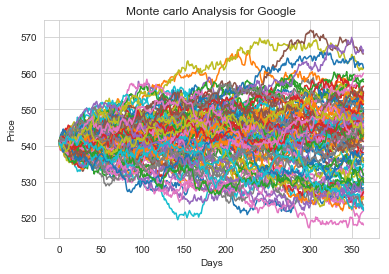

In [56]:
start_price = 540.74
for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte carlo Analysis for Google')

In [59]:
runs = 10000

simulations = np.zeros(runs)
for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

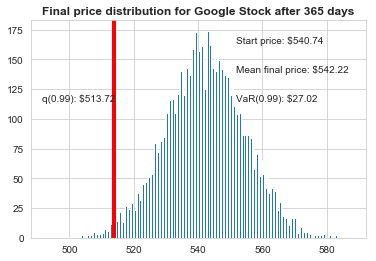

In [60]:
q = np.percentile(simulations,1)
plt.hist(simulations,bins=200)
# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');